<h1> 개발자 연봉 데이터 활용 분석, 데이터 시각화 실습 </h1>

1. 개발자 연봉 데이터 활용 ➜ 개발자 스킬, 연차, 성별, 지역, 별로 데이터 분석
2. 어떤 언어를 공부해야 높은 급여를 가질 수있는지 파악

><p>실행순서</p>
<ol type="i"> 
    <li> 1차 데이터 전처리
        <ol>
            <li> 라이브러리, 데이터 불러오기
            <li> 데이터 연산
            <li> 그룹화 함수 및 데이터 시각화
        </ol>
    <li> 2차 데이터 전처리
        <ol>
            <li> 리스트 데이터 처리
            <li> Merge 함수 활용 Frame 병합
            <li> 보유기술 및 연차에 따른 급여 시각화
        </ol>
</ol>

## <h2>1. 개발자 연봉 데이터 활용</h2>

### <h3>1. 1) 라이브러리, 데이터 불러오기</h3>

In [56]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# 인코딩 찾기
import chardet # 텍스트 파일의 문자 인코딩을 자동으로 감지하는 라이브러리

#가져올 데이터 확인
with open('./data/Developer Salary.csv','rb') as f:
    d = f.read()

In [58]:
# detect() 문자 인코딩을 자동으로 감지하는 함수
chardet.detect(d)

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}

In [59]:
# 1. 데이터 불러오기
data= pd.read_csv('./data/Developer Salary.csv', encoding='EUC-KR')

In [60]:
data.set_index('일련번호', inplace = True)
data

,나이,학력,성별,정신건강,전문직,개발공부기간,연차,국적,연봉,보유기술개수
일련번호,,,,,,,,,,
DEV1,<35,Master,Man,No,Dev,15,6,Germany,77290,7
DEV2,<35,Undergraduate,Man,No,Dev,9,6,Canada,46135,13
DEV3,>35,Master,Man,No,Dev,26,18,Germany,77831,17
DEV4,>35,Undergraduate,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,68507,3
DEV5,<35,Master,Man,No,Dev,19,10,Germany,60535,5
...,...,...,...,...,...,...,...,...,...,...
DEV33462,<35,Master,Man,Yes,Dev,7,5,United States of America,94000,5
DEV33463,<35,Undergraduate,Man,No,Dev,7,2,Germany,41058,13
DEV33464,>35,Undergraduate,Man,No,Dev,21,16,United States of America,115000,11


> **데이터 살펴보기**

* 일련번호 (인덱스 (PK))
* 나이 (<35, >35) : 35세 미만 or 35세 이상
* 학력 (Undergraduate : 학사, Master : 석사, phD : 박사, NohigherEd : 고등학교 졸업, Other : 그외 )
* 성별 (Man, Woman, NonBinary) : 남자, 여자, 제 3의 성
* 정신건강 (yes: 건강, No : 병력있음)
* 전문직 : 전문개발자가 맞는지 (삭제예정)
* 개발공부기간 : 코딩을 공부한 기간(수치형)
* 연차 : 개발자로써 일을 한 기간(수치형)
* 국적 : 독일,캐나다,영국,미국,인도,일본,한국
* 연봉 : 1년간 받는 급여(달러)
* 보유기술개수 : 해당 사람이 다룰 수 있는 기술의 개수(수치형)

In [61]:
data.head()

,나이,학력,성별,정신건강,전문직,개발공부기간,연차,국적,연봉,보유기술개수
일련번호,,,,,,,,,,
DEV1,<35,Master,Man,No,Dev,15,6,Germany,77290,7
DEV2,<35,Undergraduate,Man,No,Dev,9,6,Canada,46135,13
DEV3,>35,Master,Man,No,Dev,26,18,Germany,77831,17
DEV4,>35,Undergraduate,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,68507,3
DEV5,<35,Master,Man,No,Dev,19,10,Germany,60535,5


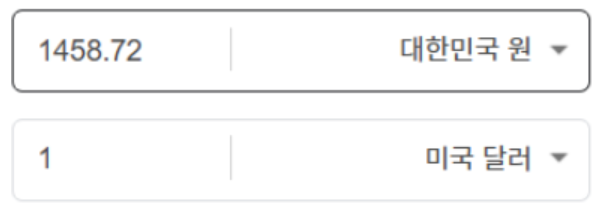

### <h3>1. 2) 데이터 연산</h3>

In [62]:
# 급여 구하기
salary = data['연봉']/12 

data['월급'] = salary

In [63]:
data['월급'] = data['월급']*1458

In [64]:
data['월급'] = data['월급'].astype('int')

In [65]:
data

,나이,학력,성별,정신건강,전문직,개발공부기간,연차,국적,연봉,보유기술개수,월급
일련번호,,,,,,,,,,,
DEV1,<35,Master,Man,No,Dev,15,6,Germany,77290,7,9390735
DEV2,<35,Undergraduate,Man,No,Dev,9,6,Canada,46135,13,5605402
DEV3,>35,Master,Man,No,Dev,26,18,Germany,77831,17,9456466
DEV4,>35,Undergraduate,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,68507,3,8323600
DEV5,<35,Master,Man,No,Dev,19,10,Germany,60535,5,7355002
...,...,...,...,...,...,...,...,...,...,...,...
DEV33462,<35,Master,Man,Yes,Dev,7,5,United States of America,94000,5,11421000
DEV33463,<35,Undergraduate,Man,No,Dev,7,2,Germany,41058,13,4988547
DEV33464,>35,Undergraduate,Man,No,Dev,21,16,United States of America,115000,11,13972500


In [66]:
# 기술 통계 확인하기
# describe() : 해당 데이터의 문자 데이터, 숫자 데이터의 기술 통계를 출력 
# 기본적으로 숫자 데이터에 대한 기술 통계 반환

data.describe()

data.info()

# 문자 데이터의 기술 통계량 확인
data.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
Index: 33466 entries, DEV1 to DEV33466
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   나이      33466 non-null  object
 1   학력      33466 non-null  object
 2   성별      33466 non-null  object
 3   정신건강    33466 non-null  object
 4   전문직     33466 non-null  object
 5   개발공부기간  33466 non-null  int64 
 6   연차      33466 non-null  int64 
 7   국적      33466 non-null  object
 8   연봉      33466 non-null  int64 
 9   보유기술개수  33466 non-null  int64 
 10  월급      33466 non-null  int32 
dtypes: int32(1), int64(4), object(6)
memory usage: 2.9+ MB


,나이,학력,성별,정신건강,전문직,국적
count,33466,33466,33466,33466,33466,33466
unique,2,5,3,2,2,7
top,<35,Undergraduate,Man,No,Dev,United States of America
freq,20746,19232,30848,24532,30588,14696


In [67]:
data.describe()

,개발공부기간,연차,연봉,보유기술개수,월급
count,33466.000000,33466.000000,33466.000000,33466.000000,3.346600e+04
mean,15.160103,9.765523,89023.017988,13.230025,1.081630e+07
std,10.092218,8.609730,53306.941978,6.840151,6.476793e+06
min,0.000000,0.000000,1.000000,0.000000,1.210000e+02
25%,8.000000,4.000000,50000.000000,8.000000,6.075000e+06
50%,12.000000,7.000000,82890.000000,12.000000,1.007114e+07
75%,20.000000,14.000000,125639.000000,17.000000,1.526514e+07
max,50.000000,50.000000,224000.000000,105.000000,2.721600e+07


In [68]:
# 개발자의 남녀 비율 확인
data['성별'].value_counts()

성별
Man          30848
Woman         1870
NonBinary      748
Name: count, dtype: int64

In [69]:
# 1. 개발자 전체 평균 월급 구하시오
data['월급'].mean().round()

10816297.0

In [70]:
# 2. 국적별 평균 월급
country_pay_mean = data[['국적','월급']].groupby(by='국적').mean().astype('int')
country_pay_mean

,월급
국적,
Canada,10491868
Germany,8489793
India,2942408
Japan,7928930
South Korea,5768357
United Kingdom of Great Britain and Northern Ireland,9855718
United States of America,15038785


### <h3>1. 3) 그룹화 함수 및 데이터 시각화</h3>

#### plt

In [71]:
# 한글불러기기
from matplotlib import pyplot as plt

plt.rcParams['font.family']='Gulim'

<Axes: ylabel='국적'>

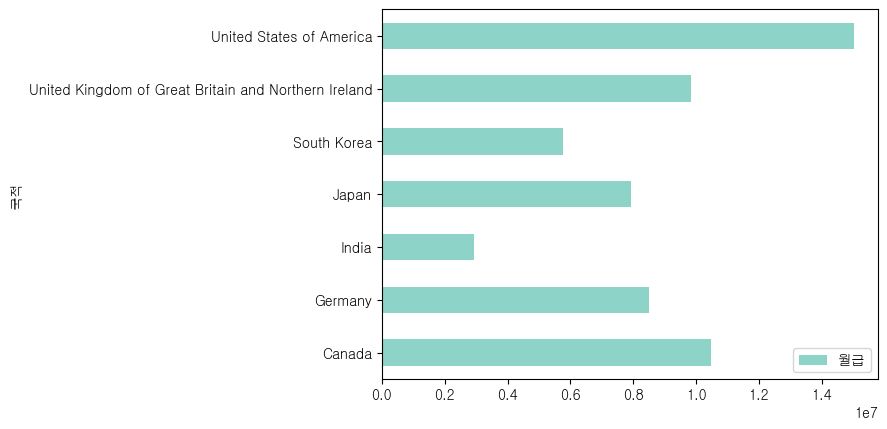

In [72]:
# 국적별 평균 월급을 시각화 해서 보기
country_pay_mean.plot(kind='barh', colormap = 'Set3')

#kind : 그래프의 종류를 정하는 매개변수
# bar : 막대그래프, 그래프의 값들의 크기 차이를 보기 용이하다

In [73]:
# 2-1 국적이 한국인 사람의 평균월듭
korea =data[data['국적']=='South Korea']
korea['월급'].mean().astype('int')

5768357

In [74]:
# 1) 학력별 평균 월급을 계산하여
hac=data[['학력','월급']].groupby(by = '학력').mean('월급').astype('int')
hac

,월급
학력,
Master,11215431
NoHigherEd,8948487
Other,10984933
PhD,12785233
Undergraduate,10619366


<Axes: ylabel='학력'>

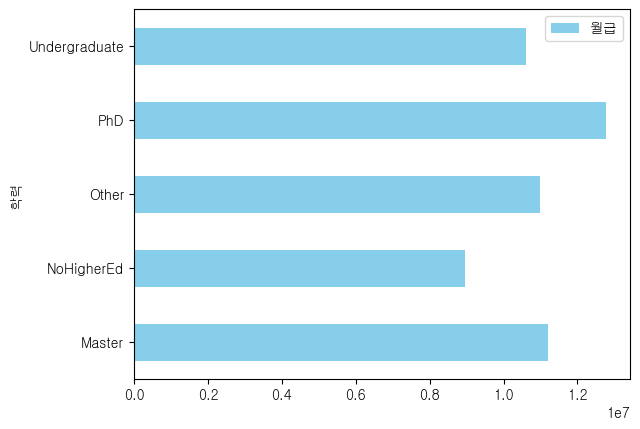

In [75]:
# 2) 시각화
hac.plot(kind='barh', color='skyblue')

In [76]:
# 성별 기준으로 평균 월급 계산
# data['성별'].mean()

In [77]:
#성별기준으로 평균 월급 시각화
gender = data[['성별','월급']].groupby(by='성별').mean().astype('int')

<Axes: xlabel='성별'>

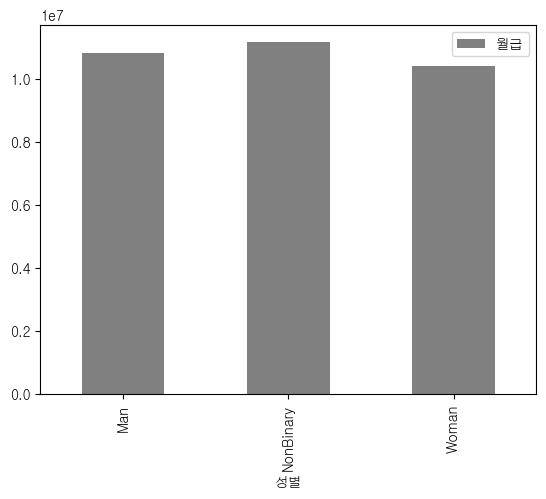

In [78]:
gender.plot(kind='bar', color='gray')

In [79]:
# 멀티 인덱스 
# 2개 이상의 컬럼을 동시에 인덱스로 갖는 경우를 멀티 인덱스라고 부름

# 성별 학력 기준으로 평균 월급을 구해봄

gender_grade = data[['성별','학력','월급']].groupby(by=['성별','학력']).mean().astype(int)
gender_grade
# groupby안에 2가지 그룹을 넣어주면 나뒤어서 인덱스를 찾을수 있게 된다.

월급
성별        학력                     
Man       Master         11224651
          NoHigherEd      9007786
          Other          11055450
          PhD            12942428
          Undergraduate  10615616
NonBinary Master         11806289
          NoHigherEd      8012275
          Other          10139613
          PhD            11278273
          Undergraduate  11603708
Woman     Master         10897994
          NoHigherEd      8310016
          Other          10014551
          PhD            11101579
          Undergraduate  10319634

<Axes: xlabel='월급', ylabel='학력'>

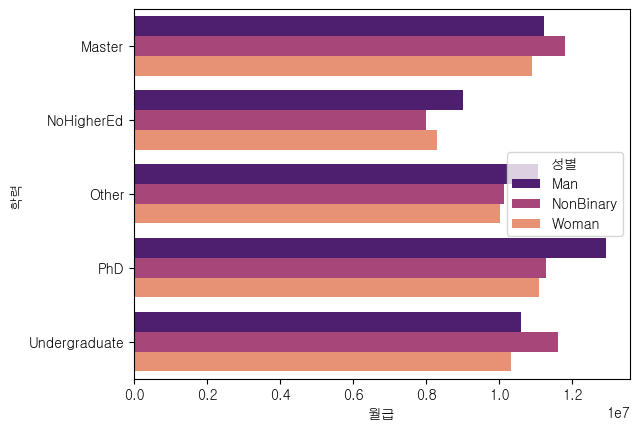

In [80]:
import seaborn as sns

sns.barplot(data=gender_grade, x = '월급', y='학력', hue = '성별', palette ='magma')
# hue > 컬럼명에 따라 막대를 색상별로 구분해서 보겠다.
# platette > 막대그래프의 색깔을 지정

In [81]:
# 나이, 국적 기준으로 평균 월급 구하기
age_coun = data[['나이','국적','월급']].groupby(by=['나이','국적']).mean().astype('int')

<Axes: xlabel='월급', ylabel='국적'>

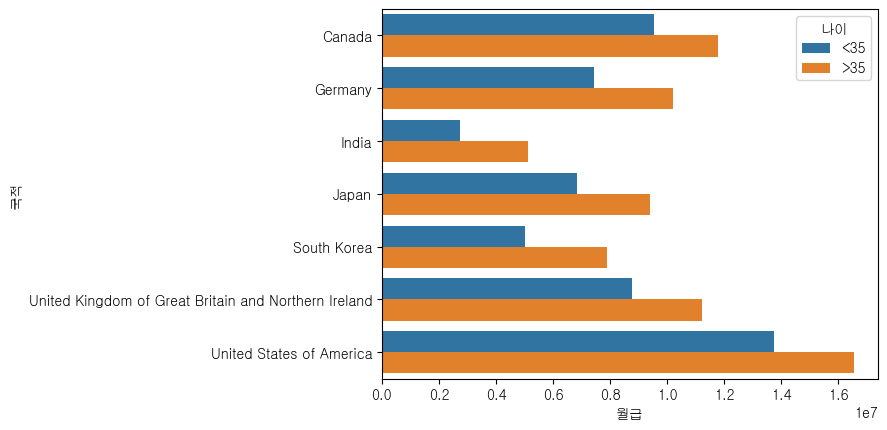

In [82]:
#시각화까지
sns.barplot(data=age_coun,x='월급',y='국적',hue='나이')

#### 멀티 인덱스 (Multi-Index)
- 2개 이상의 컬럼을 동시에 인덱스로 갖는 경우를 멀티 인덱스라 부른다
- 멀티 인덱스를 활용해서 여러 특징을 기준으로 데이터를 가져올 수 있다

#### 피벗 테이블 (Pivot Table)
- 데이터를 요약하고 집계하는데 사용하는 테이블
- 판다스에서 자주 사용하며, 데이터에서 특정 컬럼을 기준으로
        <br>그룹화 하고 평균, 합계, 걔수 등의 값을 쉽게 계산할 수 있도록 도와준다.
- 엑셀 피벗 테이블과 유사

In [83]:
data.head()

,나이,학력,성별,정신건강,전문직,개발공부기간,연차,국적,연봉,보유기술개수,월급
일련번호,,,,,,,,,,,
DEV1,<35,Master,Man,No,Dev,15,6,Germany,77290,7,9390735
DEV2,<35,Undergraduate,Man,No,Dev,9,6,Canada,46135,13,5605402
DEV3,>35,Master,Man,No,Dev,26,18,Germany,77831,17,9456466
DEV4,>35,Undergraduate,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,68507,3,8323600
DEV5,<35,Master,Man,No,Dev,19,10,Germany,60535,5,7355002


In [84]:
gender_grade_sal = data.groupby(by=['성별','학력'])[['월급']]
gender_grade_sal

                               월급
성별        학력                     
Man       Master         11224651
          NoHigherEd      9007786
          Other          11055450
          PhD            12942428
          Undergraduate  10615616
NonBinary Master         11806289
          NoHigherEd      8012275
          Other          10139613
          PhD            11278273
          Undergraduate  11603708
Woman     Master         10897994
          NoHigherEd      8310016
          Other          10014551
          PhD            11101579
          Undergraduate  10319634


<Axes: xlabel='월급', ylabel='학력'>

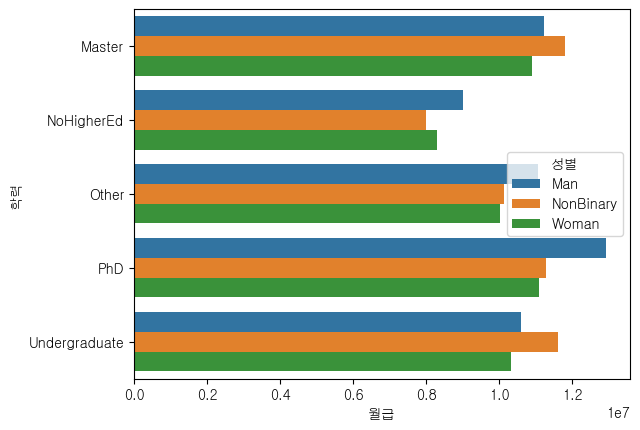

In [85]:
# 1) 성별, 학력 기준으로 평균 월급 구하기
data.head()

gender_grade_sal = data.groupby(by=['성별','학력'])[['월급']].mean().astype('int64')
print(gender_grade_sal)
# 시각화 분석
sns.barplot(data= gender_grade_sal, x='월급', y='학력', hue='성별')

                                                              월급
나이  국적                                                          
<35 Canada                                               9551650
    Germany                                              7424888
    India                                                2722030
    Japan                                                6826646
    South Korea                                          5033094
    United Kingdom of Great Britain and Northern Ir...   8773379
    United States of America                            13749138
>35 Canada                                              11796379
    Germany                                             10209748
    India                                                5113166
    Japan                                                9400767
    South Korea                                          7894659
    United Kingdom of Great Britain and Northern Ir...  11232907
    United States of Amer

<Axes: xlabel='월급', ylabel='국적'>

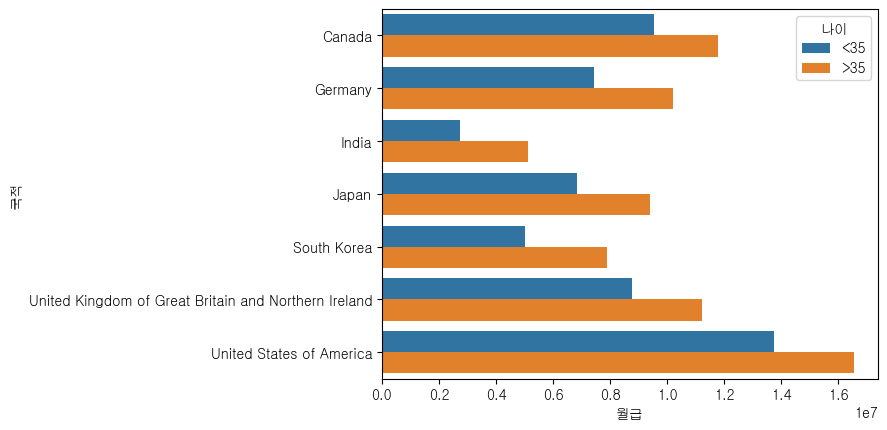

In [86]:
# 2. 나이, 국적 기준으로 평균 월급데이터 구하기
# Pivot Table을 활용해서 데이터 구하기

data.head()
# index : 특정 인덱스로 삼을 컬럼, values : 조회하고자 하는 데이터, aggfunc : 집계함수 설정
age_country_sal = pd.pivot_table(data, index=['나이', '국적'], values='월급', aggfunc='mean').astype('int64')
print(age_country_sal)

sns.barplot(data= age_country_sal, x='월급', y='국적', hue='나이')

<Axes: xlabel='연차', ylabel='월급'>

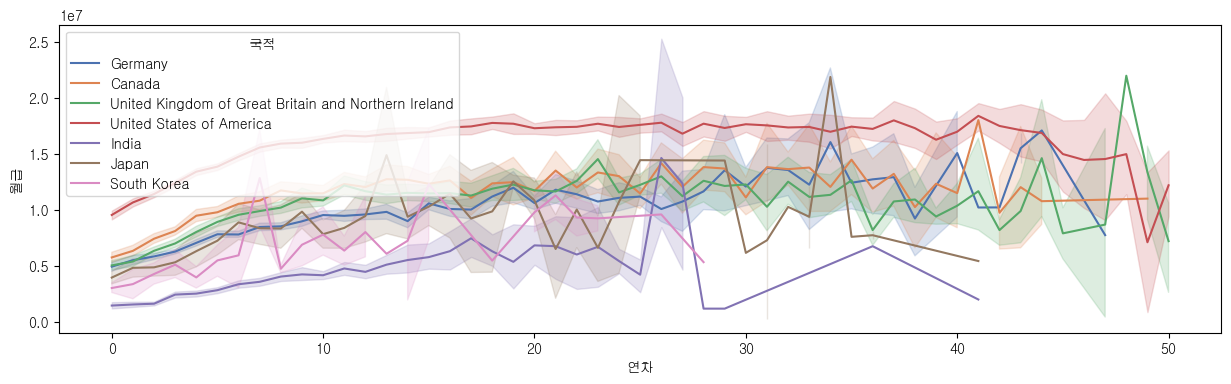

In [87]:
# 국적별 연차에 따른 월급을 시각화
# 평균 데이터가 아니라 전체 데이터에서 시각화로 진행


plt.figure(figsize=(15, 4))
sns.lineplot(data, x='연차', y='월급', hue='국적', palette='deep')


In [88]:
# 국적, 학력 기준으로 최소, 최대, 평균, 중앙, 월급을 확인
data_pivot = data.pivot_table(index=['국적', '학력'], values='월급', aggfunc=['min', 'max', 'mean', 'median']).astype('int64')
data_pivot.columns = ['최소', '최대', '평균', '중앙']# 컬럼 이름 지정하기
data_pivot

최소  \
국적                                                 학력                       
Canada                                             Master            9598   
                                                   NoHigherEd      882090   
                                                   Other            12636   
                                                   PhD            3859447   
                                                   Undergraduate    12393   
Germany                                            Master            8505   
                                                   NoHigherEd       13122   
                                                   Other           125388   
                                                   PhD               9112   
                                                   Undergraduate     9841   
India                                              Master             121   
                                                   NoHigherEd       61236   
                                                   Other             1458   
                                                   PhD             814293   
                                                   Undergraduate      850   
Japan                                              Master             972   
                                                   NoHigherEd     2163672   
                                                   Other              607   
                                                   PhD             533628   
                                                   Undergraduate      364   
South Korea                                        Master            2916   
                                                   NoHigherEd         364   
                                                   Other          2885139   
                                                   PhD            5093158   
                                                   Undergraduate      486   
United Kingdom of Great Britain and Northern Ir... Master            8383   
                                                   NoHigherEd      377622   
                                                   Other             2551   
                                                   PhD             471177   
                                                   Undergraduate     4860   
United States of America                           Master             121   
                                                   NoHigherEd       12150   
                                                   Other             4374   
                                                   PhD              21505   
                                                   Undergraduate      121   

                                                                        최대  \
국적                                                 학력                        
Canada                                             Master         25615480   
                                                   NoHigherEd     22972977   
                                                   Other          26089816   
                                                   PhD            25729812   
                                                   Undergraduate  27038610   
Germany                                            Master         26793666   
                                                   NoHigherEd     26432689   
                                                   Other          26267814   
                                                   PhD            26267814   
                                                   Undergraduate  27210168   
India                                              Master         26973000   
                                                   NoHigherEd      8462232   
                                                   Other          25281720   
                                                   

In [89]:
# 학력 (Undergraduate : 학사, Master : 석사, PhD : 박사, NoHigherEd : 고등학교 졸업, Other : 그외 )

# 피벗 테이블에서 데이터 가져오기
# 멀티 인덱싱을 통해 가져오고자 하는 값에 접근
# pivot.loc['행', '열']

# 한국의 학사 평균월급
# data_pivot.loc[('South Korea', 'Undergraduate'), '평균']
data_pivot.loc[('Japan', 'NoHigherEd'),('중앙', '최대')]
data_pivot.loc[('South Korea', ('Master', 'PhD')),('평균', '최대', '최소')]

평균        최대       최소
국적          학력                                
South Korea Master  6407117  17058600     2916
            PhD     5093158   5093158  5093158

In [90]:
# 각자 다른 산술 연산 적용
data.pivot_table(data, index=['국적'], aggfunc={'연차':'median', '월급':'mean'}).astype('int64')

,연차,월급
국적,,
Canada,8,10491868
Germany,7,8489793
India,4,2942408
Japan,7,7928930
South Korea,4,5768357
United Kingdom of Great Britain and Northern Ireland,8,9855718
United States of America,8,15038785


## <h2>2. 개발자별 보유 스킬 데이터 다루기</h2>
- Developer Skills.csv
- 어떤 기술을 공부해야 높은 급여를 받는데 유리한지 분석
- 문자, 리스트 데이터 처리
- Merge() 활용해서 데이터 병합 == 데이터베이스에 조인

### <h3>데이터 불러오기, 전처리</h3>

In [91]:
# 1. 데이터 불러오기 > 2. 일련번호를 인덱스로 설정
skill_data = pd.read_csv('./data/Developer Skills.csv', encoding='EUC-KR')
skill_data.set_index('일련번호', inplace=True)

skill_data = pd.read_csv('./data/Developer Skills.csv', encoding='EUC-KR', index_col='일련번호')

In [92]:
# 3. 데이터 확인
skill_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33466 entries, DEV1 to DEV33466
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   보유기술    33438 non-null  object
dtypes: object(1)
memory usage: 522.9+ KB


In [93]:
data.head()
skill_data.head() # ;으로 구분
# data(개발자 연봉 데이터)와 skill_data(개발자 스킬 데이터)의 일련번호는 PK, FK관계

,보유기술
일련번호,
DEV1,C;C++;Java;Perl;Ruby;Git;Ruby on Rails
DEV2,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...
DEV3,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...
DEV4,Python;Git;PostgreSQL
DEV5,C;C++;Java;Python;Git


In [94]:
try:
    skill_data = skill_data['보유기술'].str.split(';') # split은 띄어쓰기 구분이 아님!!
except:
    pass

In [95]:
# explode() : 리스트 형태의 데이터를 다수의 행으로
explode_skill = skill_data.explode()
explode_skill

일련번호
DEV1                           C
DEV1                         C++
DEV1                        Java
DEV1                        Perl
DEV1                        Ruby
                    ...         
DEV33465                DynamoDB
DEV33465    Microsoft SQL Server
DEV33465                  SQLite
DEV33466                  Python
DEV33466                  Docker
Name: 보유기술, Length: 442784, dtype: object

In [96]:
explode_skill.shape
explode_skill.isnull().sum()
explode_skill.isnull().value_counts()

보유기술
False    442756
True         28
Name: count, dtype: int64

### <h3> 데이터 병합 </h3>

```개발 스킬별 연봉 데이터를 보기 위해 merge()함수를 활용하여 스킬 데이터와 개발자 연봉 데이터를 병합하기``` 

- 공통된 컬럼을 기준으로 양쪽의 데이터를 병합할 때 활용
- DB의 조인 개념과 같다 (Inner, Outer)

![image](C:/Users/smhrd/Documents/카카오톡 받은 파일/KakaoTalk_20250224_141606682.png)

In [97]:
# 개발자 연봉 데이터(data)와 개발자 스킬 데이터(skill_data)의 인덱스가 먼저 일치하는지 확인
print(len(data.index)) # 개발자 연봉
print(len(skill_data.index)) # 개발자 스킬

33466
33466


In [98]:
# Inner join으로 합치기
# pd.merge(data, skill_data, how='inner', on='일련번호')
join_data = pd.merge(data, explode_skill, how='inner', on='일련번호')

In [99]:
join_data.head()

,나이,학력,성별,정신건강,전문직,개발공부기간,연차,국적,연봉,보유기술개수,월급,보유기술
일련번호,,,,,,,,,,,,
DEV1,<35,Master,Man,No,Dev,15,6,Germany,77290,7,9390735,C
DEV1,<35,Master,Man,No,Dev,15,6,Germany,77290,7,9390735,C++
DEV1,<35,Master,Man,No,Dev,15,6,Germany,77290,7,9390735,Java
DEV1,<35,Master,Man,No,Dev,15,6,Germany,77290,7,9390735,Perl
DEV1,<35,Master,Man,No,Dev,15,6,Germany,77290,7,9390735,Ruby


In [100]:
# 데이터 확인
join_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442784 entries, DEV1 to DEV33466
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   나이      442784 non-null  object
 1   학력      442784 non-null  object
 2   성별      442784 non-null  object
 3   정신건강    442784 non-null  object
 4   전문직     442784 non-null  object
 5   개발공부기간  442784 non-null  int64 
 6   연차      442784 non-null  int64 
 7   국적      442784 non-null  object
 8   연봉      442784 non-null  int64 
 9   보유기술개수  442784 non-null  int64 
 10  월급      442784 non-null  int32 
 11  보유기술    442756 non-null  object
dtypes: int32(1), int64(4), object(7)
memory usage: 42.2+ MB


In [101]:
# 결측치 확인
join_data.isnull().sum()
# 결측치 데이터 조회
join_data[join_data['보유기술'].isnull()]
join_data['보유기술'] = join_data['보유기술'].fillna('없음')

In [102]:
# 개발자의 기술별로 평균 연봉을 조회해보자
# 개발자의 보유 기술 목록안에 있는 고유값 조회
join_data['보유기술'].unique()

array(['C', 'C++', 'Java', 'Perl', 'Ruby', 'Git', 'Ruby on Rails',
       'Bash/Shell', 'HTML/CSS', 'JavaScript', 'PHP', 'SQL', 'jQuery',
       'Laravel', 'AWS', 'MySQL', 'PostgreSQL', 'Kotlin', 'Node.js',
       'TypeScript', 'Docker', 'Kubernetes', 'Angular', 'Express',
       'Spring', 'Heroku', 'DynamoDB', 'Python', 'Assembly', 'Rust',
       'Ansible', 'Terraform', 'Yarn', 'React.js', 'SQLite', 'C#', 'VBA',
       'ASP.NET', 'Microsoft SQL Server', 'Gatsby', 'R', 'Flask',
       'ASP.NET Core ', 'Microsoft Azure', 'Elasticsearch', 'Julia',
       'Matlab', 'Google Cloud Platform', 'Clojure', 'Go', 'Angular.js',
       'MariaDB', 'MongoDB', 'Dart', 'PowerShell', 'Xamarin', 'Couchbase',
       'Redis', 'Vue.js', 'Chef', 'Unity 3D', 'Django', 'F#', 'Scala',
       'Unreal Engine', 'FastAPI', 'Firebase', 'DigitalOcean',
       'Objective-C', 'Swift', 'Symfony', 'IBM Cloud or Watson', 'Oracle',
       'Groovy', 'IBM DB2', 'Puppet', 'Cassandra', 'LISP', 'Delphi',
       'APL', 'Erlang'

In [103]:
# 1) 한국 개발자 데이터만 가져오기
korea_dev = join_data[join_data['국적'] == 'South Korea']
# 2) 보유 기술별 월급의 평균을 구하시오.
koreadev_skill_sal = korea_dev.groupby(by='보유기술')['월급'].mean().astype('int64')
koreadev_skill_sal_ = korea_dev[['보유기술', '월급']].groupby(by='보유기술').mean().astype('int64')

### <h3> 데이터 시각화 </h3>

<Axes: ylabel='보유기술'>

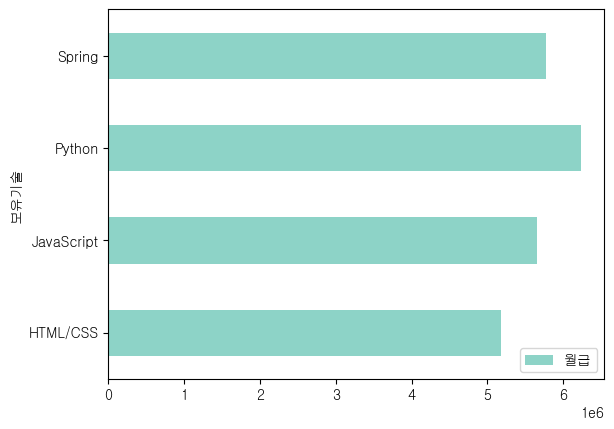

In [104]:
front_back = koreadev_skill_sal_.loc[['HTML/CSS', 'JavaScript', 'Python', 'Spring']]

front_back.plot(kind='barh', colormap='Set3')

<Axes: ylabel='보유기술'>

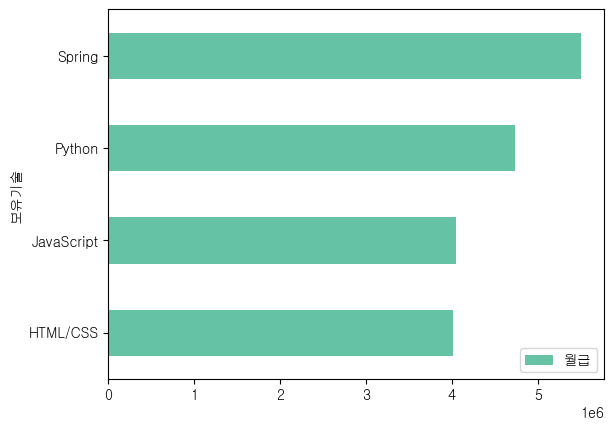

In [105]:
# 나이, 경력, 보유 기술 개수를 고려해서 조건을 설정하여 다시 분석할 필요가 있다.
# 나이가 35세 미만이고, 연차는 3년 이하 -> 주니어(신입)
junior_dev = korea_dev[(korea_dev['연차'] <= 3) & (korea_dev['나이'] == '<35')]
junior_dev = junior_dev[['보유기술', '월급']].groupby(by='보유기술').mean().astype('int64')

front_back = junior_dev.loc[['HTML/CSS', 'JavaScript', 'Python', 'Spring']]
front_back.plot(kind='barh', colormap='Set2')

<Axes: xlabel='보유기술'>

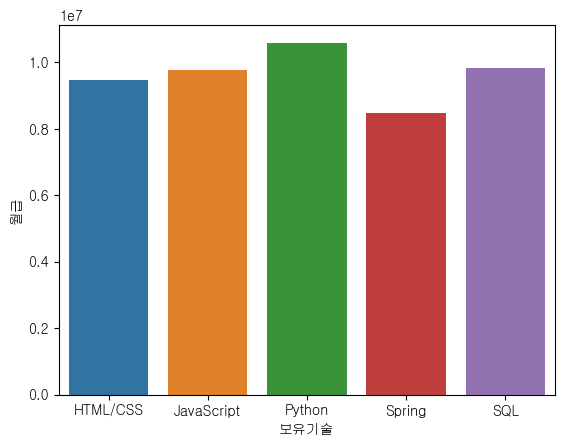

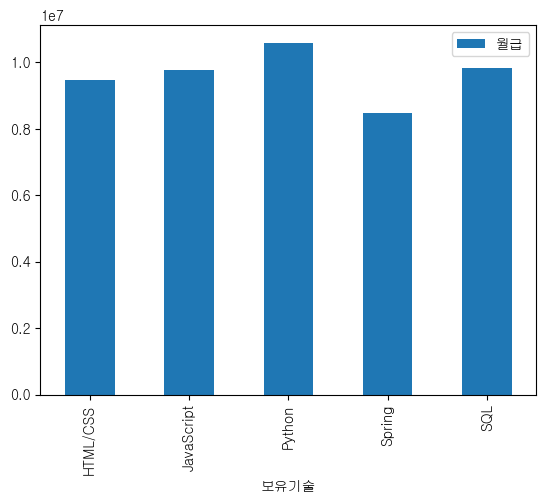

In [106]:
# # 1. 미들급 개발자 = 연차가 4 이상, 7이하
mid_dev = join_data[(join_data['연차'] <=7) & (join_data['연차'] >=4)]
# 2. 미들급 개발자의 보유 기술 별 평균 월급을 구하시오
mid_dev = mid_dev[["보유기술", "월급"]].groupby(by="보유기술").mean().astype('int64').loc[['HTML/CSS', 'JavaScript', 'Python', 'Spring','SQL']]
mid_dev.loc[['HTML/CSS', 'JavaScript', 'Python', 'Spring','SQL']]
# 3. 시각화
sns.barplot(data=mid_dev.loc[['HTML/CSS', 'JavaScript', 'Python', 'Spring','SQL']], x="보유기술", y="월급", hue="보유기술")

(join_data[(join_data['연차'] <=7) & (join_data['연차'] >=4)]
 [["보유기술", "월급"]].groupby(by="보유기술").mean().astype('int64')
 .loc[['HTML/CSS', 'JavaScript', 'Python', 'Spring','SQL']].plot(kind='bar'))

<Axes: xlabel='보유기술', ylabel='월급'>

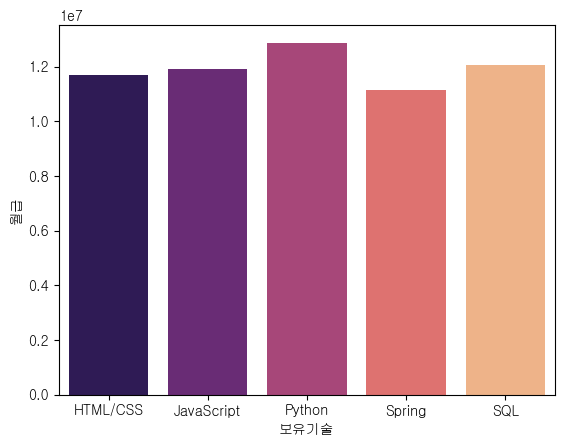

In [107]:
# # 시니어 개발자 = 연차가 8이상 나이가 35이상
# # 1. 시니어 개발자의 데이터를 가져오기
# senior_dev = join_data[(join_data['연차'] >= 8) & (join_data['나이'] == '<35')]
# # 2. 시니어 개발자의 보유 기술별 평균 월급 구하기
# senior_dev = senior_dev[['보유기술', '월급']].groupby(by='보유기술').mean().astype('int64')
# # 3. seaborn 라이브러리로 시각화 ('HTML/CSS', 'JavaScript', 'Python', 'Spring','SQL')
# sns.barplot(data = senior_dev.loc[['HTML/CSS', 'JavaScript', 'Python', 'Spring','SQL']]
#             , x='보유기술', y='월급', hue='보유기술' )

sns.barplot(data = join_data[(join_data['연차'] >= 8) & (join_data['나이'] == '<35')]
            [['보유기술', '월급']].groupby(by='보유기술').mean().astype('int64')
            .loc[['HTML/CSS', 'JavaScript', 'Python', 'Spring','SQL']]
            , x='보유기술', y='월급', hue='보유기술', palette='magma')

## 상관계수 분석

In [108]:
# corr()함수를 활용하여 상관관계 출력
# -> 문자 데이터가 섞여 있으면 numeric_only = True 설정이 필요

join_data.corr(numeric_only=True) # 공분산 행렬

,개발공부기간,연차,연봉,보유기술개수,월급
개발공부기간,1.000000,0.900152,0.375811,0.015856,0.375811
연차,0.900152,1.000000,0.398403,0.012139,0.398403
연봉,0.375811,0.398403,1.000000,0.059573,1.000000
보유기술개수,0.015856,0.012139,0.059573,1.000000,0.059573
월급,0.375811,0.398403,1.000000,0.059573,1.000000


<Axes: >

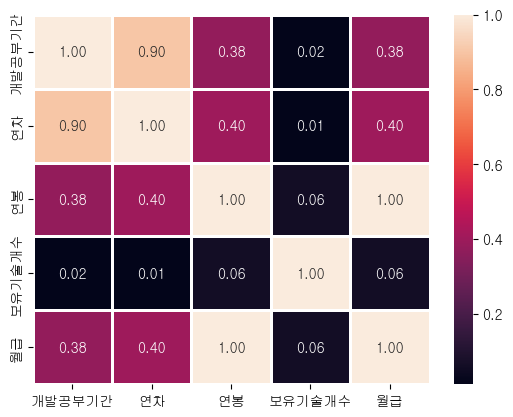

In [109]:
# hearmap() 상관계수를 시각화
sns.heatmap(join_data.corr(numeric_only=True), annot=True, fmt='.2f', linewidths=1)